# Analysis of Megamillions Pooling Strategies

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# ONLY CHANGE THIS CELL ACCORDING TO THE NUMBER OF TICKETS YOU WILL BUY
# AND WHAT THE JACKPOT IS TOMORROW
num_tickets = 30
jackpot = 910000000

In [3]:
# https://www.megamillions.com/How-to-Play.aspx
odds = [1.0 / 302575350,
  1.0 / 12607306,
  1.0 / 931001,
  1.0 / 387792,
  1.0 / 14547,
  1.0 / 606,
  1.0 / 693]


# Estimation of remaining prizes since megamillions doesn't post them until
# after the win
prizes = {'five_mega': {'odds': odds[0], 'prize': jackpot, 'label': "\U000025EF\U000025EF\U000025EF\U000025EF\U000025EF+\U0001F63B"}}
matches = [('five_mega', "\U000025EF\U000025EF\U000025EF\U000025EF\U000025EF+\U0001F63B"),
           ('five', "\U000025EF\U000025EF\U000025EF\U000025EF\U000025EF"),
           ('four_mega', "\U000025EF\U000025EF\U000025EF\U000025EF+\U0001F63B"),
           ('four', "\U000025EF\U000025EF\U000025EF\U000025EF"),
           ('three_mega', "\U000025EF\U000025EF\U000025EF+\U0001F63B"),
           ('three', "\U000025EF\U000025EF\U000025EF"),
           ('two_mega', "\U000025EF\U000025EF+\U0001F63B")]
for i in range(1, len(odds)):
  # https://docs.google.com/spreadsheets/d/14EakglartHPbf1usvD3Y7hIRyDBoTiMYLBB7cCNHa5Y/edit?usp=sharing
  # Based on past 3 days of prizes, prize = 1.13E-03 * (odds ^ -1.3)
  # is the trendline (with R^2 0.969), but the past prizes have not been monotonic based on the
  # jackpot prize and odds, so this is just an estimate. The two smallest prizes
  # are always $4 and $2, so they don't need to be estimated
  prize = 1.13E-03 * math.pow(odds[i], -1.3)
  prize_key, label = matches[i]
  prizes[prize_key] = {'odds': odds[i], 'prize': prize, 'label': label}
prizes['one_mega'] = {'odds': 1.0 / 89, 'prize': 4, 'label': "\U000025EF+\U0001F63B"}
prizes['mega'] = {'odds': 1.0 / 37, 'prize': 2, 'label': "\U0001F63B"}
prizes['none'] = {'odds': 1 - 1.0 / 24, 'prize': 0, 'label': "\U00002620"}
print(prizes)

{'five_mega': {'odds': 3.304961888005748e-09, 'prize': 910000000, 'label': '◯◯◯◯◯+😻'}, 'five': {'odds': 7.931908688501731e-08, 'prize': 1922593.3051750422, 'label': '◯◯◯◯◯'}, 'four_mega': {'odds': 1.0741127023494067e-06, 'prize': 64970.11495488582, 'label': '◯◯◯◯+😻'}, 'four': {'odds': 2.5787019845690473e-06, 'prize': 20809.27466881845, 'label': '◯◯◯◯'}, 'three_mega': {'odds': 6.87426960885406e-05, 'prize': 291.53044394239015, 'label': '◯◯◯+😻'}, 'three': {'odds': 0.0016501650165016502, 'prize': 4.680506523697423, 'label': '◯◯◯'}, 'two_mega': {'odds': 0.001443001443001443, 'prize': 5.5722635438427295, 'label': '◯◯+😻'}, 'one_mega': {'odds': 0.011235955056179775, 'prize': 4, 'label': '◯+😻'}, 'mega': {'odds': 0.02702702702702703, 'prize': 2, 'label': '😻'}, 'none': {'odds': 0.9583333333333334, 'prize': 0, 'label': '☠'}}


In [4]:
# DO NOT CHANGE THESE CONSTANTS
cost = 2
num_white_balls = 5
min_white_num = 1
max_white_num = 70
num_mega_balls = 1
min_mega_ball = 1
max_mega_ball = 25

In [5]:
# Generate the ticket numbers completely randomly, with no accounting for
# overlap between tickets
def generateRandomTickets(num_balls, min_num, max_num, num_tickets):
  num_range = list(range(min_num, max_num))
  tickets = []
  for i in range(num_tickets):
    tickets.append(sorted(random.sample(num_range, k=num_balls)))
  return tickets

def generateRandom(num_tickets):
  random_tickets = generateRandomTickets(num_white_balls, min_white_num, max_white_num, num_tickets)
  random_mega_balls = generateRandomTickets(num_mega_balls, min_mega_ball, max_mega_ball, num_tickets)

  # Merge them together
  for i in range(num_tickets):
    random_tickets[i] += random_mega_balls[i]

  return random_tickets

print(generateRandom(num_tickets))

[[13, 14, 25, 36, 46, 15], [40, 47, 49, 50, 61, 16], [4, 18, 22, 56, 64, 2], [14, 38, 47, 48, 64, 13], [2, 12, 43, 51, 69, 20], [12, 25, 29, 36, 63, 10], [6, 10, 27, 39, 44, 3], [3, 4, 21, 34, 55, 8], [16, 37, 46, 66, 69, 17], [13, 17, 30, 58, 59, 11], [8, 19, 46, 56, 67, 15], [15, 37, 57, 61, 62, 14], [31, 52, 56, 67, 68, 24], [15, 32, 54, 62, 63, 5], [16, 18, 27, 37, 55, 19], [18, 24, 32, 34, 37, 15], [16, 44, 46, 57, 59, 13], [15, 40, 45, 58, 60, 9], [26, 39, 48, 54, 64, 14], [3, 22, 35, 55, 60, 16], [3, 35, 37, 48, 69, 24], [2, 41, 45, 57, 61, 5], [9, 17, 26, 37, 59, 24], [6, 16, 24, 53, 63, 15], [34, 47, 48, 52, 64, 18], [1, 36, 37, 41, 46, 8], [11, 16, 23, 41, 45, 12], [6, 34, 37, 47, 50, 11], [11, 29, 31, 53, 56, 14], [30, 35, 46, 49, 55, 13]]


In [6]:
# Generate the ticket numbers by pigeonhole principling. Basically we want both
# the white balls and the megaballs to be evenly spread out across all the tickets
# to maximize the chances of matching on a single number
def generateOptimizedTickets(num_balls, min_num, max_num, num_tickets):
  num_range = list(range(min_num, max_num))
  tickets = []
  for i in range(num_tickets):
    if (len(num_range) < num_balls):
      pick = num_range
      num_range = list(range(min_num, max_num))
      for num in pick:
        num_range.remove(num)
      rest_of_pick = (random.sample(num_range, k=(num_balls-len(pick))))
      num_range = list(range(min_num, max_num))
      for num in rest_of_pick:
        num_range.remove(num)
      pick = sorted(pick + rest_of_pick)
    else:
      pick = sorted(random.sample(num_range, k=num_balls))
      # Pigeonhole principle the numbers until they're out
      for num in pick:
        num_range.remove(num)
    tickets.append(pick)
  return tickets


def generateOptimized(num_tickets):
  optimized_tickets = generateOptimizedTickets(num_white_balls, min_white_num, max_white_num, num_tickets)
  optimized_mega_balls = generateOptimizedTickets(num_mega_balls, min_mega_ball, max_mega_ball, num_tickets)

  # Merge them together
  for i in range(num_tickets):
    optimized_tickets[i] += optimized_mega_balls[i]

  return optimized_tickets

print(generateOptimized(num_tickets))

[[5, 12, 35, 51, 66, 6], [47, 48, 55, 60, 61, 4], [16, 26, 27, 40, 59, 3], [22, 28, 36, 42, 56, 1], [2, 10, 23, 46, 62, 7], [4, 20, 21, 41, 67, 21], [8, 30, 33, 45, 54, 12], [31, 32, 38, 43, 69, 24], [1, 13, 49, 58, 65, 19], [6, 18, 25, 39, 68, 16], [24, 29, 50, 52, 53, 14], [11, 19, 37, 44, 64, 23], [3, 14, 15, 34, 63, 8], [7, 9, 17, 25, 57, 11], [7, 18, 21, 32, 34, 9], [8, 9, 39, 50, 55, 18], [2, 22, 58, 63, 65, 17], [31, 37, 40, 46, 48, 2], [11, 26, 33, 45, 59, 10], [15, 17, 44, 54, 61, 13], [3, 6, 56, 57, 67, 5], [1, 23, 41, 43, 66, 15], [5, 29, 42, 68, 69, 20], [12, 38, 52, 60, 64, 22], [4, 10, 13, 20, 62, 3], [16, 28, 35, 36, 51, 5], [19, 24, 30, 49, 53, 13], [10, 14, 27, 47, 55, 22], [7, 12, 36, 41, 68, 10], [6, 11, 35, 44, 60, 11]]


In [7]:
# Expected Value
expected_value = -num_tickets * cost
for item in prizes.values():
  expected_value += num_tickets * item['odds'] * item['prize']
print(expected_value)

42.54787987745266


In [8]:
def getPrize(ticket, lottery):
  ticket_white_balls = ticket[0:num_white_balls]
  lottery_white_balls = lottery[0:num_white_balls]
  white_matches = [value for value in ticket_white_balls if value in lottery_white_balls]
  num_white_matches = len(white_matches)
  # Assuming 1 mega ball
  ticket_mega_ball = ticket[len(ticket) - 1]
  lottery_mega_ball = lottery[len(lottery) - 1]
  mega_ball_matches = ticket_mega_ball == lottery_mega_ball

  match num_white_matches:
    case 0:
      if (mega_ball_matches):
        return 'mega'
      else:
        return 'none'
    case 1:
      if (mega_ball_matches):
        return 'one_mega'
      else:
        return 'none'
    case 2:
      if (mega_ball_matches):
        return 'two_mega'
      else:
        return 'none'
    case 3:
      if (mega_ball_matches):
        return 'three_mega'
      else:
        return 'three'
    case 4:
      if (mega_ball_matches):
        return 'four_mega'
      else:
        return 'four'
    case 5:
      if (mega_ball_matches):
        return 'five_mega'
      else:
        return 'five'
    case other:
      return 'none'

In [ ]:
from IPython.display import clear_output

# Monte-Carlo to see which strategy is optimal for random lottery numbers chosen
num_runs_per_minute = 200000 # takes ~1 minute per 200,000 runs on my computer - this is hardware specific!!
num_runs = 2 * 60 * num_runs_per_minute 
random_prizes = {prize: 0 for prize in prizes.keys()} # prizes for each ticket
optimized_prizes = {prize: 0 for prize in prizes.keys()}

for i in range(num_runs):
  if i % (num_runs_per_minute // 60) == 0:
    clear_output(wait=True)
    print('Progress: {:.1%}'.format(i * 1.0 / num_runs))

    time = (num_runs - i) * 60.0 / num_runs_per_minute # time remaining in seconds
    day = time // (24 * 3600)
    time = time % (24 * 3600)
    hour = time // 3600
    time %= 3600
    minutes = time // 60
    time %= 60
    seconds = time

    print('Estimated Time Remaining: %d days, %d hours, %d minutes, %d seconds'%(day, hour, minutes, seconds))
    
  lottery = generateRandom(1)[0]
  random_tickets = generateRandom(num_tickets)
  for ticket in random_tickets:
    prize = getPrize(ticket, lottery)
    random_prizes[prize] += 1

  optimized_tickets = generateOptimized(num_tickets)
  for ticket in optimized_tickets:
    prize = getPrize(ticket, lottery)
    optimized_prizes[prize] += 1

clear_output(wait=True)
print(random_prizes, optimized_prizes)
print('Random Average Profit: %f'%(sum([prizes[prize]['prize'] * num for (prize, num) in random_prizes.items()]) * 1.0 / (num_runs * num_tickets) - cost) + 
      ', Optimized Average Profit: %f'%(sum([prizes[prize]['prize'] * num for (prize, num) in optimized_prizes.items()]) * 1.0 / (num_runs * num_tickets) - cost) + 
     ', Expected Ticket Profit: %f'%(sum([prize['prize'] * prize['odds'] for prize in prizes.values()])))

In [9]:
# This uses parallelization to do the same thing. The numba package is the easiest out of the box
# parallelizer I could find http://numba.pydata.org/numba-doc/latest/user/parallel.html#explicit-parallel-loops
# but requires jit compiling all functions used - hence the re-declaration of functions like generateRandomTickets
# and certain constants in this cell.
# Empirically parallelization is 10x faster on my computer (i.e. 10x more runs can be done per minute)
from IPython.display import clear_output
from numba import njit, prange, jit

@jit(nopython=True)
def generateRandomTickets(num_balls, min_num, max_num, num_tickets):
  num_range = list(range(min_num, max_num))
  tickets = []
  for i in range(num_tickets):
    tickets.append(sorted(np.random.choice(np.array(num_range), size=num_balls, replace=False)))
  return tickets

@jit(nopython=True)
def generateRandom(num_tickets):
  random_tickets = generateRandomTickets(num_white_balls, min_white_num, max_white_num, num_tickets)
  random_mega_balls = generateRandomTickets(num_mega_balls, min_mega_ball, max_mega_ball, num_tickets)

  # Merge them together
  for i in range(num_tickets):
    random_tickets[i].append(random_mega_balls[i][0])

  return random_tickets

@jit(nopython=True)
def generateOptimizedTickets(num_balls, min_num, max_num, num_tickets):
  num_range = list(range(min_num, max_num))
  tickets = []
  for i in range(num_tickets):
    if (len(num_range) < num_balls):
      pick = num_range
      num_range = list(range(min_num, max_num))
      for num in pick:
        num_range.remove(num)
      rest_of_pick = (np.random.choice(np.array(num_range), size=(num_balls-len(pick)), replace=False))
      num_range = list(range(min_num, max_num))
      for num in rest_of_pick:
        num_range.remove(num)
        pick.append(num)
      pick = sorted(pick)
    else:
      pick = sorted(np.random.choice(np.array(num_range), size=num_balls, replace=False))
      # Pigeonhole principle the numbers until they're out
      for num in pick:
        num_range.remove(num)
    tickets.append(pick)
  return tickets

@jit(nopython=True)
def generateOptimized(num_tickets):
  optimized_tickets = generateOptimizedTickets(num_white_balls, min_white_num, max_white_num, num_tickets)
  optimized_mega_balls = generateOptimizedTickets(num_mega_balls, min_mega_ball, max_mega_ball, num_tickets)

  # Merge them together
  for i in range(num_tickets):
    optimized_tickets[i].append(optimized_mega_balls[i][0])

  return optimized_tickets

@jit(nopython=True)
def getPrize(ticket, lottery):
  ticket_white_balls = ticket[0:num_white_balls]
  lottery_white_balls = lottery[0:num_white_balls]
  white_matches = [value for value in ticket_white_balls if value in lottery_white_balls]
  num_white_matches = len(white_matches)
  # Assuming 1 mega ball
  ticket_mega_ball = ticket[len(ticket) - 1]
  lottery_mega_ball = lottery[len(lottery) - 1]
  mega_ball_matches = ticket_mega_ball == lottery_mega_ball

  match num_white_matches:
    case 0:
      if (mega_ball_matches):
        return 'mega'
      else:
        return 'none'
    case 1:
      if (mega_ball_matches):
        return 'one_mega'
      else:
        return 'none'
    case 2:
      if (mega_ball_matches):
        return 'two_mega'
      else:
        return 'none'
    case 3:
      if (mega_ball_matches):
        return 'three_mega'
      else:
        return 'three'
    case 4:
      if (mega_ball_matches):
        return 'four_mega'
      else:
        return 'four'
    case 5:
      if (mega_ball_matches):
        return 'five_mega'
      else:
        return 'five'
    case other:
      return 'none'

# Monte-Carlo to see which strategy is optimal for random lottery numbers chosen
num_runs_per_minute = 2000000 # takes ~1 minute per 2,000,000 runs on my computer - this is hardware specific!!
num_runs = 12 * 60 * num_runs_per_minute 

# Using parallel=False is still 2x faster than regular python. This is because Numba is JIT compiling and optimizing 
# See https://towardsdatascience.com/supercharging-numpy-with-numba-77ed5b169240
# However, parallel=True is up to 10x faster than the regular python in the cell above! This is because
# we can parallelize checking each run :)

# For comparison, on my computer when num_runs = 200k:
#   - regular python (cell above): ~1 minute
#   - parallel=False: ~30 seconds
#   - parallel=True: ~15 seconds (my guess is that there is a constant overhead for parallelization that leads to less of a win)

# When num_runs = 2M
#   - regular python (cell above): ~10 minutes (linearly increases)
#   - parallel=False: ~4.5 minutes
#   - parallel=True: ~1 minute

# When num_runs = 24M
#   - regular python (cell above): ~2 hours! (linearly increases)
#   - parallel=False: Didn't run this
#   - parallel=True: ~12 minutes
@njit(parallel=True)
def runSimulation():
    # Updating arrays or dicts is not atomic and leads to race conditions. Using individual variables is fine though
    # http://numba.pydata.org/numba-doc/latest/user/parallel.html
    random_five_mega = 0
    random_five = 0
    random_four_mega = 0
    random_four = 0
    random_three_mega = 0
    random_three = 0
    random_two_mega = 0
    random_one_mega = 0
    random_mega = 0
    random_none = 0
    optimized_five_mega = 0
    optimized_five = 0
    optimized_four_mega = 0
    optimized_four = 0
    optimized_three_mega = 0
    optimized_three = 0
    optimized_two_mega = 0
    optimized_one_mega = 0
    optimized_mega = 0
    optimized_none = 0    
    
    for i in prange(num_runs):
      lottery = generateRandom(1)[0]
      random_tickets = generateRandom(num_tickets)
      for ticket in random_tickets:
        prize = getPrize(ticket, lottery)
        if prize == 'five_mega':
            random_five_mega += 1
        elif prize == 'five':
            random_five += 1
        elif prize == 'four_mega':
            random_four_mega += 1
        elif prize == 'four':
            random_four += 1
        elif prize == 'three_mega':
            random_three_mega += 1
        elif prize == 'three':
            random_three += 1
        elif prize == 'two_mega':
            random_two_mega += 1
        elif prize == 'one_mega':
            random_one_mega += 1
        elif prize == 'mega':
            random_mega += 1
        else:
            random_none += 1

      optimized_tickets = generateOptimized(num_tickets)
      for ticket in optimized_tickets:
        prize = getPrize(ticket, lottery)
        if prize == 'five_mega':
            optimized_five_mega += 1
        elif prize == 'five':
            optimized_five += 1
        elif prize == 'four_mega':
            optimized_four_mega += 1
        elif prize == 'four':
            optimized_four += 1
        elif prize == 'three_mega':
            optimized_three_mega += 1
        elif prize == 'three':
            optimized_three += 1
        elif prize == 'two_mega':
            optimized_two_mega += 1
        elif prize == 'one_mega':
            optimized_one_mega += 1
        elif prize == 'mega':
            optimized_mega += 1
        else:
            optimized_none += 1
    random_prizes_fast = {'five_mega': random_five_mega, 'five': random_five, 'four_mega': random_four_mega, 'four': random_four, 
                      'three_mega': random_three_mega, 'three': random_three, 'two_mega': random_two_mega, 'one_mega': random_one_mega, 
                      'mega': random_mega, 'none': random_none}
    optimized_prizes_fast = {'five_mega': optimized_five_mega, 'five': optimized_five, 'four_mega': optimized_four_mega, 'four': optimized_four, 
                      'three_mega': optimized_three_mega, 'three': optimized_three, 'two_mega': optimized_two_mega, 'one_mega': optimized_one_mega, 
                      'mega': optimized_mega, 'none': optimized_none}

    return random_prizes_fast, optimized_prizes_fast

random_prizes_fast, optimized_prizes_fast = runSimulation()
print(random_prizes_fast, optimized_prizes_fast)
print('Random Average Profit: %f'%(sum([prizes[prize]['prize'] * num for (prize, num) in random_prizes_fast.items()]) * 1.0 / (num_runs * num_tickets) - cost) + 
      ', Optimized Average Profit: %f'%(sum([prizes[prize]['prize'] * num for (prize, num) in optimized_prizes_fast.items()]) * 1.0 / (num_runs * num_tickets) - cost) + 
     ', Expected Ticket Profit: %f'%(sum([prize['prize'] * prize['odds'] for prize in prizes.values()])))

{five_mega: 165, five: 3733, four_mega: 51487, four: 1179198, three_mega: 3227207, three: 74253750, two_mega: 66723588, one_mega: 508857632, mega: 1221108060, none: 41324595180} {five_mega: 169, five: 3604, four_mega: 51321, four: 1176227, three_mega: 3229685, three: 74262306, two_mega: 66742632, one_mega: 508833038, mega: 1221122386, none: 41324578632}
Random Average Profit: 2.429357, Optimized Average Profit: 2.506213, Expected Ticket Profit: 3.418263


In [10]:
print(sum(random_prizes_fast.values()), sum(optimized_prizes_fast.values()))

43200000000 43200000000


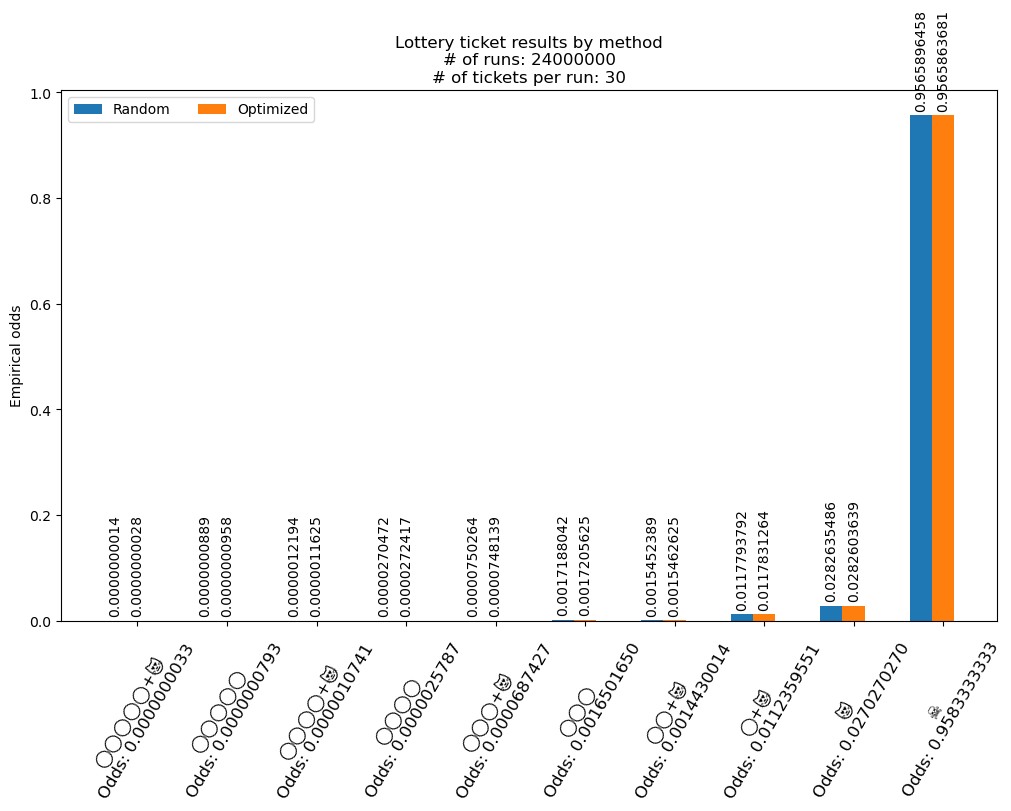

In [53]:
# Creating bar chart
# Based on https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
prize_labels = ['%s\nOdds: %.10f'%(prize['label'], prize['odds']) for prize in prizes.values()]
plt.rcParams['figure.figsize'] = [10, 8]
methods = {
    'Random': [prize * 1.0 / (num_tickets * num_runs) for prize in random_prizes.values()],
    'Optimized': [prize * 1.0 / (num_tickets * num_runs) for prize in optimized_prizes.values()],
}

x = np.arange(len(prize_labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for method, values in methods.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=method)
    ax.bar_label(rects, padding=3, rotation=90, fmt='%.10f')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Empirical odds')
ax.set_title(f'Lottery ticket results by method\n# of runs: {num_runs}\n# of tickets per run: {num_tickets}')
ax.set_xticks(x + width, prize_labels)
ax.legend(loc='upper left', ncols=3)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation=60)
plt.show()

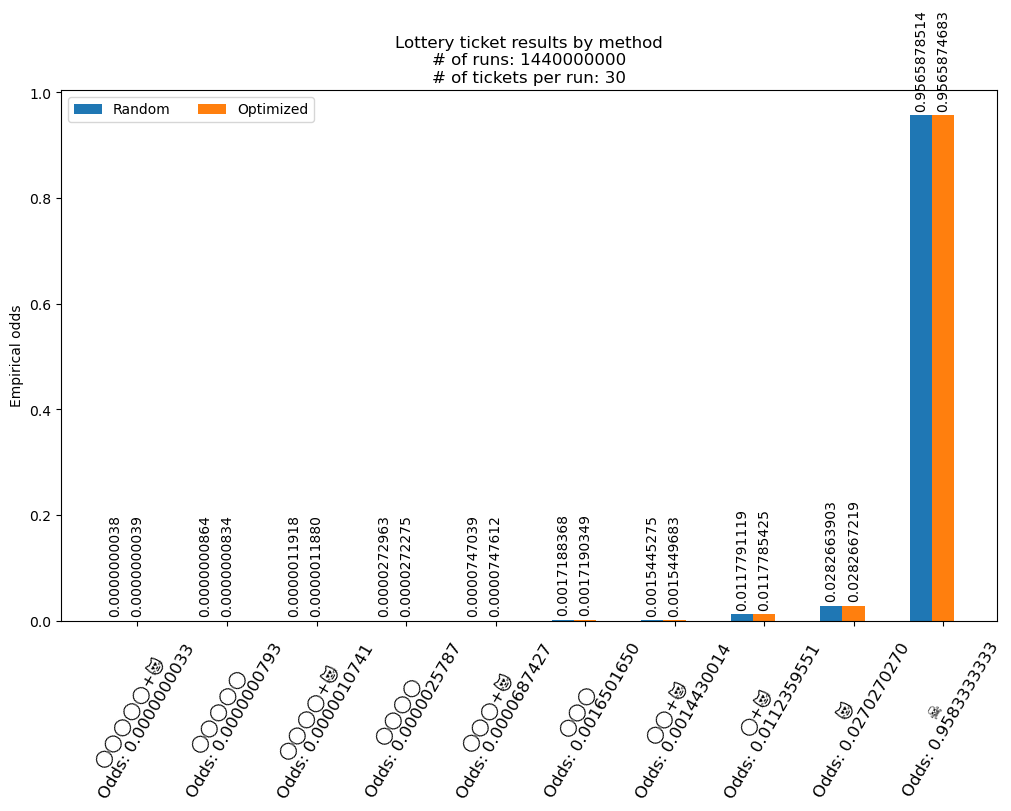

In [11]:
# Creating bar chart
# Based on https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
prize_labels = ['%s\nOdds: %.10f'%(prize['label'], prize['odds']) for prize in prizes.values()]
plt.rcParams['figure.figsize'] = [10, 8]
methods = {
    'Random': [prize * 1.0 / (num_tickets * num_runs) for prize in random_prizes_fast.values()],
    'Optimized': [prize * 1.0 / (num_tickets * num_runs) for prize in optimized_prizes_fast.values()],
}

x = np.arange(len(prize_labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for method, values in methods.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=method)
    ax.bar_label(rects, padding=3, rotation=90, fmt='%.10f')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Empirical odds')
ax.set_title(f'Lottery ticket results by method\n# of runs: {num_runs}\n# of tickets per run: {num_tickets}')
ax.set_xticks(x + width, prize_labels)
ax.legend(loc='upper left', ncols=3)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation=60)
plt.show()